In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from sklearn.model_selection import train_test_split 

In [0]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
import numpy

In [0]:
print(numpy.unique(y_train))
print("Number of labels:",len(numpy.unique(y_train)))

[0 1 2 3 4 5 6 7 8 9]
Number of labels: 10


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
type(x_train)

numpy.ndarray

label:  4


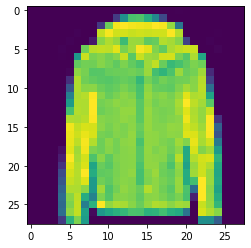

In [0]:
import matplotlib.pyplot as plt
print("label: ",y_train[5000])
plt.imshow(x_train[5000])

In [0]:
#normalizing the image
x_train,x_test=x_train/255.0,x_test/255.0

In [0]:
model = keras.models.Sequential([ keras.layers.Flatten(),
                                  keras.layers.Dense(128,activation=tf.nn.relu),
                                  keras.layers.Dense(10,activation=tf.nn.softmax) ])

In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [0]:
class callback_custom(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('loss') < 0.182:
      print("Stopping training")
      self.model.stop_training=True


In [0]:
callback = callback_custom()

In [0]:
model.fit(x_train,y_train,epochs=15,callbacks=[callback],validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1225 - acc: 0.9538 - val_loss: 0.4452 - val_acc: 0.8835
